In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
domestic16 = pd.read_csv('domestic_visitors_2016.csv')
domestic17 = pd.read_csv('domestic_visitors_2017.csv')
domestic18 = pd.read_csv('domestic_visitors_2018.csv')
domestic19 = pd.read_csv('domestic_visitors_2019.csv')

## Let's check the data quality

In [3]:
domestic16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  372 non-null    object
 1   date      372 non-null    object
 2   month     372 non-null    object
 3   year      372 non-null    int64 
 4   visitors  372 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.7+ KB


### If we can look at the data randomly we'll see some missing values in visitors columns but the previous cell says there's no missing values, that means those are empty strings

In [4]:
domestic16.sample(20)

,district,date,month,year,visitors
211,Nalgonda,01-08-2016,August,2016,988102
270,Ranga Reddy,01-07-2016,July,2016,
170,Medak,01-03-2016,March,2016,1318000
180,Medchal,01-01-2016,January,2016,
59,Jangaon,01-12-2016,December,2016,12680
77,Jogulamba Gadwal,01-06-2016,June,2016,
190,Medchal,01-11-2016,November,2016,
97,Karimnagar,01-02-2016,February,2016,779960
242,Peddapalli,01-03-2016,March,2016,
90,Kamareddy,01-07-2016,July,2016,


### Let's look at the next year domestic data
### So as we can see it's the same issue

In [5]:
domestic17.sample(10)

,district,date,month,year,visitors
4,Adilabad,01-05-2017,May,2017,11752
56,Jangaon,01-09-2017,September,2017,15600
258,Rajanna Sircilla,01-07-2017,July,2017,462022
127,Komaram Bheem Asifabad,01-08-2017,August,2017,3665
244,Peddapalli,01-05-2017,May,2017,640
204,Nalgonda,01-01-2017,January,2017,4447
85,Kamareddy,01-02-2017,February,2017,50
367,Yadadri Bhongir,01-08-2017,August,2017,680720
232,Nizamabad,01-05-2017,May,2017,1341
125,Komaram Bheem Asifabad,01-06-2017,June,2017,3796


### We'll just merg all the domestic data together

In [6]:
pd.concat([domestic16,domestic17,domestic18,domestic19],ignore_index=True)

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887
...,...,...,...,...,...
1507,Yadadri Bhongir,01-08-2019,August,2019,389010
1508,Yadadri Bhongir,01-09-2019,September,2019,366862
1509,Yadadri Bhongir,01-10-2019,October,2019,381860
1510,Yadadri Bhongir,01-11-2019,November,2019,365990


## Save in a single dataframe

In [7]:
domestic = pd.concat([domestic16,domestic17,domestic18,domestic19],ignore_index=True)

## Now we'll do the same thing for the foreign visitors dataframes

In [8]:
foreign16 = pd.read_csv('foreign_visitors_2016.csv')
foreign17 = pd.read_csv('foreign_visitors_2017.csv')
foreign18 = pd.read_csv('foreign_visitors_2018.csv')
foreign19 = pd.read_csv('foreign_visitors_2019.csv')

## As we can see there's some missing values prresent here as well

In [9]:
foreign16.sample(20)

,district,date,month,year,visitors
272,Ranga Reddy,01-09-2016,September,2016,
215,Nalgonda,01-12-2016,December,2016,0
2,Adilabad,01-03-2016,March,2016,2
358,Warangal (Urban),01-11-2016,November,2016,97
214,Nalgonda,01-11-2016,November,2016,0
164,Mancherial,01-09-2016,September,2016,
77,Jogulamba Gadwal,01-06-2016,June,2016,
244,Peddapalli,01-05-2016,May,2016,
181,Medchal,01-02-2016,February,2016,
12,Bhadradri Kothagudem,01-01-2016,January,2016,


## Let's join them together

In [10]:
foreign = pd.concat([foreign16,foreign17,foreign18,foreign19],ignore_index=True)

## To check the data types of each column

In [11]:
domestic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1482 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.2+ KB


## Data cleaning: Get rid of the missing values and empty strings

In [12]:
domestic.query("visitors.notna() and visitors != ' '")

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887
...,...,...,...,...,...
1507,Yadadri Bhongir,01-08-2019,August,2019,389010
1508,Yadadri Bhongir,01-09-2019,September,2019,366862
1509,Yadadri Bhongir,01-10-2019,October,2019,381860
1510,Yadadri Bhongir,01-11-2019,November,2019,365990


In [13]:
domestic_clean = domestic.query("visitors.notna() and visitors != ' '").copy()

## To check if still there's any missing values

In [14]:
domestic_clean.query("visitors.isna() == True")

,district,date,month,year,visitors


## To change the visitor number as integers

In [17]:
domestic_clean['visitors'] = domestic_clean['visitors'].astype(int)

In [18]:
domestic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1167 non-null   object
 1   date      1167 non-null   object
 2   month     1167 non-null   object
 3   year      1167 non-null   int64 
 4   visitors  1167 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 50.1+ KB


## To get the top districts visitor wise

In [19]:
domestic_clean.groupby('district')['visitors'].sum().sort_values(ascending=False)

district
Hyderabad                   83900960
Rajanna Sircilla            41763276
Warangal (Urban)            30726603
Yadadri Bhongir             26893080
Bhadradri Kothagudem        21600962
Medak                       20542639
Jayashankar Bhoopalpally    19632865
Mahbubnagar                 17180118
Nirmal                      13315796
Jagtial                     11303514
Sangareddy                  10424510
Karimnagar                   9462383
Khammam                      9378315
Nagarkurnool                 7424355
Adilabad                     7321575
Jogulamba Gadwal             6813340
Nalgonda                     6401933
Siddipet                     5775285
Mulugu                       1819800
Wanaparthy                    890078
Mancherial                    867242
Jangaon                       826280
Warangal (Rural)              819162
Mahabubabad                   600697
Narayanapet                   389250
Nizamabad                     116147
Komaram Bheem Asifabad       

In [22]:
domestic_clean.groupby('district')['visitors'].sum().sort_values(ascending=False).head(10)

district
Hyderabad                   83900960
Rajanna Sircilla            41763276
Warangal (Urban)            30726603
Yadadri Bhongir             26893080
Bhadradri Kothagudem        21600962
Medak                       20542639
Jayashankar Bhoopalpally    19632865
Mahbubnagar                 17180118
Nirmal                      13315796
Jagtial                     11303514
Name: visitors, dtype: int32

<Axes: ylabel='district'>

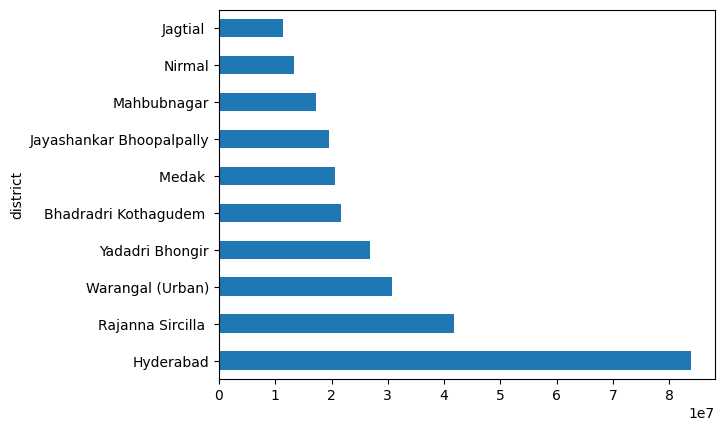

In [34]:
domestic_clean.groupby('district')['visitors'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

<Axes: ylabel='district'>

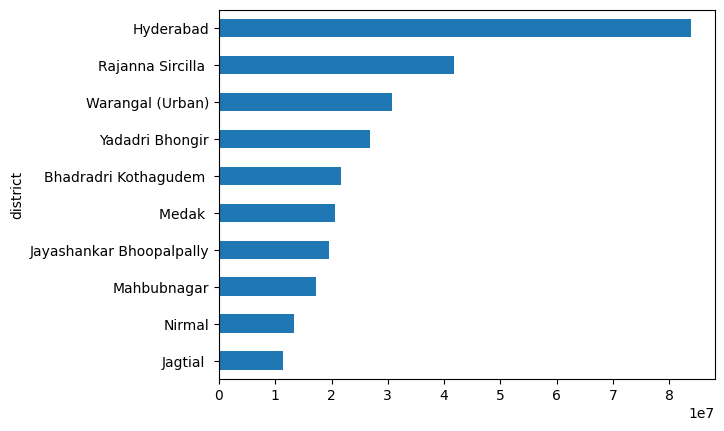

In [33]:
domestic_clean.groupby('district')['visitors'].sum().sort_values(ascending=False).head(10)[::-1].plot(kind='barh')